# Scaling Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
import wrangle
import prepare
import warnings
warnings.filterwarnings('ignore')

In [2]:
telco = wrangle.wrangle_telco()

In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1695 entries, 0013-SMEOE to 9995-HOTOH
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1695 non-null   float64
 1   tenure           1695 non-null   int64  
 2   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 53.0+ KB


In [4]:
train, validate, test = wrangle.train_validate_test_split(telco)
train.shape, validate.shape, test.shape

((949, 3), (407, 3), (339, 3))

## 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .

### Summarize the Train DF

In [5]:
train.shape

(949, 3)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 7501-IWUNG to 9418-RUKPH
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  949 non-null    float64
 1   tenure           949 non-null    int64  
 2   total_charges    949 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 29.7+ KB


In [7]:
train.describe()

,monthly_charges,tenure,total_charges
count,949.000000,949.000000,949.000000
mean,61.224921,56.495258,3729.519968
std,34.779455,18.354262,2600.297158
min,18.400000,0.000000,0.000000
25%,22.950000,47.000000,1237.650000
50%,64.700000,64.000000,3603.450000
75%,90.400000,71.000000,6052.250000
max,118.650000,72.000000,8670.100000


In [8]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
7501-IWUNG,73.80,61,4616.05
1303-SRDOK,69.05,55,3842.60
3967-VQOGC,24.90,67,1680.25
3777-XROBG,19.55,58,1079.65
5075-JSDKI,24.45,59,1493.10


### Min-Max Scaling

In [9]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train)

MinMaxScaler()

In [10]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [11]:
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

Text(0.5, 1.0, 'Scaled')

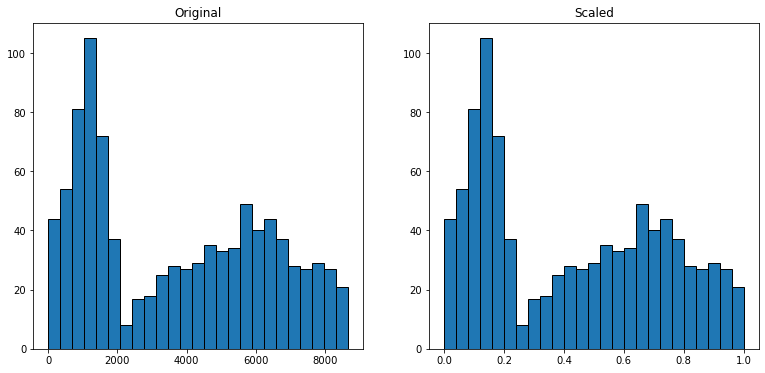

In [12]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.total_charges, bins=25, ec='black')
plt.title('Scaled')

### Standard Scaler

In [13]:
#Create the scaler object
scaler = sklearn.preprocessing.StandardScaler()

In [14]:
#Fit data on train
scaler.fit(train)

StandardScaler()

In [15]:
#Use transform to apply the scaling to the split data sets
train_standard_scaled = scaler.transform(train)
validate_standard_scaled = scaler.transform(validate)
test_standard_scaled = scaler.transform(test)

In [16]:
#Convert scaled arrays to a pandas dataframe
train_standard_scaled = pd.DataFrame(train_standard_scaled, columns=train.columns)
validate_standard_scaled = pd.DataFrame(validate_standard_scaled, columns=train.columns)
test_standard_scaled = pd.DataFrame(test_standard_scaled, columns=train.columns)

Text(0.5, 1.0, 'Scaled')

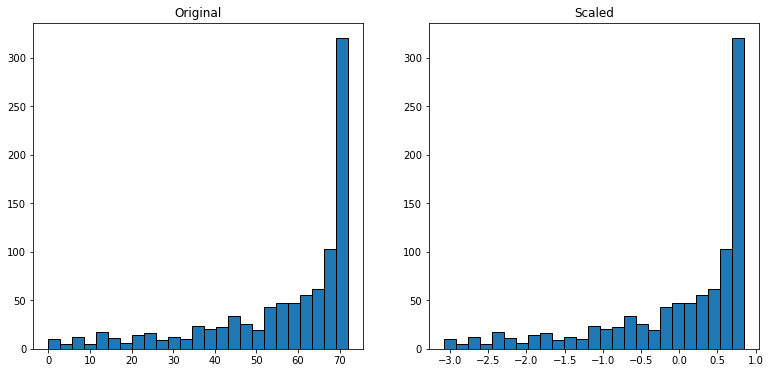

In [17]:
#Visualize the distributions of the unscaled and scaled data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_standard_scaled.tenure, bins=25, ec='black')
plt.title('Scaled')

### Robut Scaler

In [18]:
#Create the object
scaler = sklearn.preprocessing.RobustScaler()

#Fit the data on train
scaler.fit(train)

#Apply the scaled data to the split datasets 
train_robust_scaled = scaler.transform(train)
validate_robust_scaled = scaler.transform(validate)
test_robust_scaled = scaler.transform(test)

In [19]:
#Convert the scaled data from an array to dataframe
train_robust_scaled = pd.DataFrame(train_robust_scaled, columns=train.columns)
validate_robust_scaled = pd.DataFrame(validate_robust_scaled, columns=validate.columns)
test_robust_scaled = pd.DataFrame(test_robust_scaled, columns=test.columns)

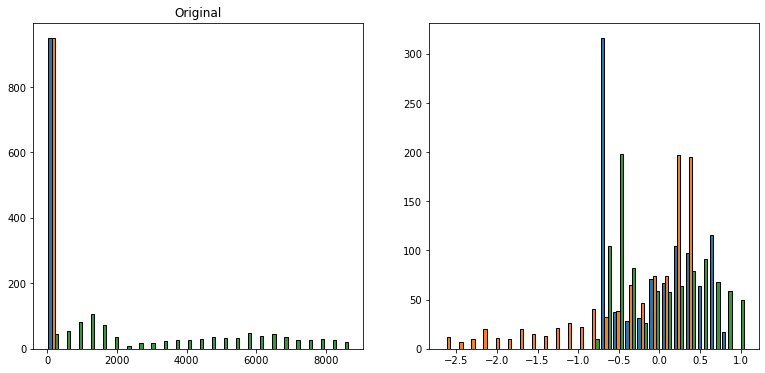

In [20]:
#Visualize the distributions
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_robust_scaled, bins=25, ec="black")
plt.show()

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

### Apply .inverse_transform to the Min-Max Scaled Data

In [21]:
#Apply .inverse_transform to the Min-Max Scaled Data
train_og = scaler.inverse_transform(train_scaled)

#Convert inverse transformed data from an array to a pandas dataframe with same columns as og dataset
train_og = pd.DataFrame(train_og, columns=train.columns)

In [22]:
#Comapare if the inversed transformed dataset is the same as the original, pre-standard scaled dataset
train_og.describe(), train.describe()

(       monthly_charges      tenure  total_charges
 count       949.000000  949.000000     949.000000
 mean         93.513376   82.831753    5674.492645
 std          23.400242    6.118087    1443.973045
 min          64.700000   64.000000    3603.450000
 25%          67.761322   79.666667    4290.730388
 50%          95.851471   85.333333    5604.484633
 75%         113.142893   87.666667    6964.329673
 max         132.150000   88.000000    8418.050000,
        monthly_charges      tenure  total_charges
 count       949.000000  949.000000     949.000000
 mean         61.224921   56.495258    3729.519968
 std          34.779455   18.354262    2600.297158
 min          18.400000    0.000000       0.000000
 25%          22.950000   47.000000    1237.650000
 50%          64.700000   64.000000    3603.450000
 75%          90.400000   71.000000    6052.250000
 max         118.650000   72.000000    8670.100000)

<div class="alert alert-block alert-info"><b>Takeaway:</b> Applying the inverse transform fucntion to the min-max scaled data set does not return the original data set exactly the same. </div>

### Apply .inverse_transform to the Standard Scaled Data

In [23]:
#Apply .inverse_transform to the Standard Scaled Data
train_og = scaler.inverse_transform(train_standard_scaled)

#Convert inverse transformed data from an array to a pandas dataframe with same columns as og dataset
train_og = pd.DataFrame(train_og, columns=train.columns)

In [24]:
#Comapare if the inversed transformed dataset is the same as the original, pre-standard scaled dataset
train_og.describe(), train.describe()

(       monthly_charges      tenure  total_charges
 count       949.000000  949.000000     949.000000
 mean         64.700000   64.000000    3603.450000
 std          67.485566   24.012655    4817.138677
 min         -18.396875   -9.912050   -3305.612231
 25%          -9.568119   51.577471   -1012.823630
 50%          71.442995   73.818361    3369.901108
 75%         121.310913   82.976375    7906.386161
 max         176.126816   84.284663   12756.042073,
        monthly_charges      tenure  total_charges
 count       949.000000  949.000000     949.000000
 mean         61.224921   56.495258    3729.519968
 std          34.779455   18.354262    2600.297158
 min          18.400000    0.000000       0.000000
 25%          22.950000   47.000000    1237.650000
 50%          64.700000   64.000000    3603.450000
 75%          90.400000   71.000000    6052.250000
 max         118.650000   72.000000    8670.100000)

<div class="alert alert-block alert-info"><b>Takeaway:</b> Applying the inverse transform fucntion to the standard scaled data set does not return the original data set exactly the same. </div>

### Apply .inverse_transform to the Robust Scaled Data

In [25]:
#Apply .inverse_transform to the Min-Max Scaled Data
train_og = scaler.inverse_transform(train_robust_scaled)

#Convert inverse transformed data from an array to a pandas dataframe with same columns as og dataset
train_og = pd.DataFrame(train_og, columns=train.columns)

In [26]:
#Comapare if the inversed transformed dataset is the same as the original, pre-standard scaled dataset
train_og.describe(), train.describe()

(       monthly_charges      tenure  total_charges
 count       949.000000  949.000000     949.000000
 mean         61.224921   56.495258    3729.519968
 std          34.779455   18.354262    2600.297158
 min          18.400000    0.000000       0.000000
 25%          22.950000   47.000000    1237.650000
 50%          64.700000   64.000000    3603.450000
 75%          90.400000   71.000000    6052.250000
 max         118.650000   72.000000    8670.100000,
        monthly_charges      tenure  total_charges
 count       949.000000  949.000000     949.000000
 mean         61.224921   56.495258    3729.519968
 std          34.779455   18.354262    2600.297158
 min          18.400000    0.000000       0.000000
 25%          22.950000   47.000000    1237.650000
 50%          64.700000   64.000000    3603.450000
 75%          90.400000   71.000000    6052.250000
 max         118.650000   72.000000    8670.100000)

<div class="alert alert-block alert-info"><b>Takeaway:</b> Applying the inverse transform fucntion to the robust scaled data set DOES return the original data set exactly the same. </div>

## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

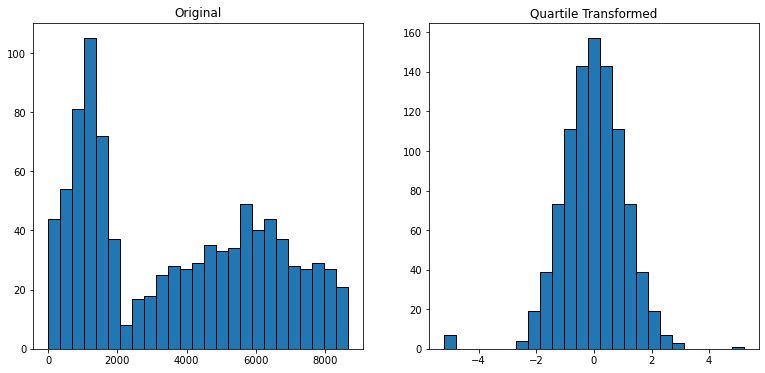

In [27]:
#Create the Quantile Transformer Object
qt = QuantileTransformer(output_distribution='normal')

#Fit the data on train
qt.fit_transform(train)

train_qt_scaled = qt.transform(train)
validate_qt_scaled = qt.transform(validate)
test_qt_scaled = qt.transform(test)

#Convert the scaled data from an array to dataframe
train_qt_scaled = pd.DataFrame(train_qt_scaled, columns=train.columns)
validate_qt_scaled = pd.DataFrame(validate_qt_scaled, columns=validate.columns)
test_qt_scaled = pd.DataFrame(test_qt_scaled, columns=test.columns)

#Visualize the distributions
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_qt_scaled.total_charges, bins=25, ec="black")
plt.title('Quartile Transformed')
plt.show()

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

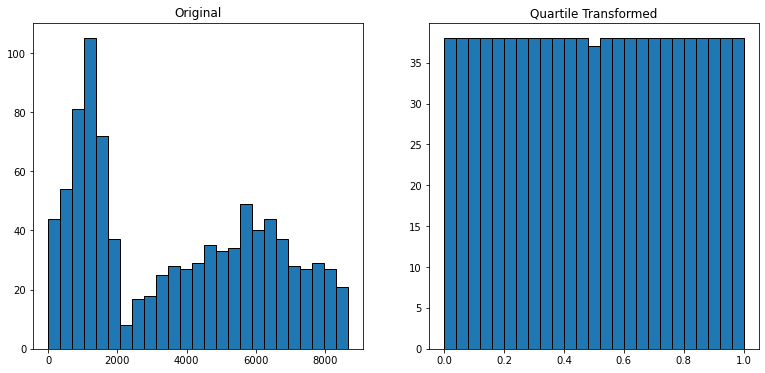

In [28]:
#Create the Quantile Transformer Object
qt = QuantileTransformer()

#Fit the data on train
qt.fit_transform(train)

train_qt_scaled = qt.transform(train)
validate_qt_scaled = qt.transform(validate)
test_qt_scaled = qt.transform(test)

#Convert the scaled data from an array to dataframe
train_qt_scaled = pd.DataFrame(train_qt_scaled, columns=train.columns)
validate_qt_scaled = pd.DataFrame(validate_qt_scaled, columns=validate.columns)
test_qt_scaled = pd.DataFrame(test_qt_scaled, columns=test.columns)

#Visualize the distributions
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_qt_scaled.total_charges, bins=25, ec="black")
plt.title('Quartile Transformed')
plt.show()

<div class="alert alert-block alert-info"><b>Takeaway:</b> The default arguement for the output distribution hyperparameter is uniform. Thus, the QT object scales the data uniformly.  </div>

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [29]:
train_scaled, validate_scaled, test_scaled = prepare.scale_telco(telco)

In [30]:
#check the shapes of the split dfs
train_scaled.shape, validate_scaled.shape, test_scaled.shape

((949, 3), (407, 3), (339, 3))

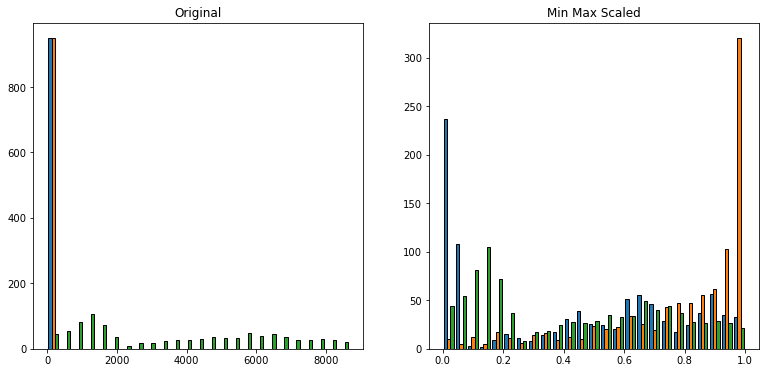

In [31]:
#Visualize the distributions
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec="black")
plt.title('Min Max Scaled')
plt.show()